# Import software libraries

In [1]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 2.2.5
- Python 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
- pandas 2.2.3
- Matplotlib 3.10.3
- Seaborn 0.13.2


# Read and examine the data

In [2]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 

data = pd.read_pickle('online_history_cleaned.pickle')

# Preview the first five rows of the data.

data.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [3]:
# Get the shape of the data.
data.shape


(15206, 9)

In [4]:
# Get the data types for every column in the DataFrame.
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15206 entries, 0 to 17031
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      15206 non-null  object        
 1   StockCode    15206 non-null  object        
 2   Quantity     15206 non-null  int64         
 3   InvoiceDate  15206 non-null  datetime64[ns]
 4   Price        15194 non-null  float64       
 5   CustomerID   12435 non-null  object        
 6   Country      15206 non-null  object        
 7   TotalAmount  15194 non-null  float64       
 8   Description  15206 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.2+ MB


# Generate summary statistics for all of the data

In [5]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
desc = data.describe(include='all')

# Be sure to include all variables, including categorical ones.
desc.rename(index={'50%': 'median'}, inplace=True)
desc


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
count,15206,15206,15206.000000,15206,15194.000000,12435,15206,15194.000000,15206
unique,8315,10,NaN,NaN,NaN,2473,1,NaN,10
top,536876,85123A,NaN,NaN,NaN,u17841,United Kingdom,NaN,CREAM HANGING HEART T-LIGHT HOLDER
freq,10,2163,NaN,NaN,NaN,171,15206,NaN,2163
mean,NaN,NaN,16.775483,2011-06-19 06:03:05.279494912,4.164267,NaN,NaN,40.705153,NaN
min,NaN,NaN,1.000000,2010-12-01 08:26:00,0.400000,NaN,NaN,0.550000,NaN
25%,NaN,NaN,2.000000,2011-03-22 15:31:00,1.650000,NaN,NaN,8.850000,NaN
median,NaN,NaN,6.000000,2011-06-20 12:32:00,2.550000,NaN,NaN,16.500000,NaN
75%,NaN,NaN,12.000000,2011-09-23 12:57:30,4.950000,NaN,NaN,30.360000,NaN
max,NaN,NaN,4300.000000,2011-12-09 12:31:00,32.040000,NaN,NaN,4921.500000,NaN


# Plot a bar chart for the average price per item

C:\Users\User\AppData\Local\Temp\ipykernel_1608\594983934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_item.values, y=avg_price_per_item.index, palette='viridis')


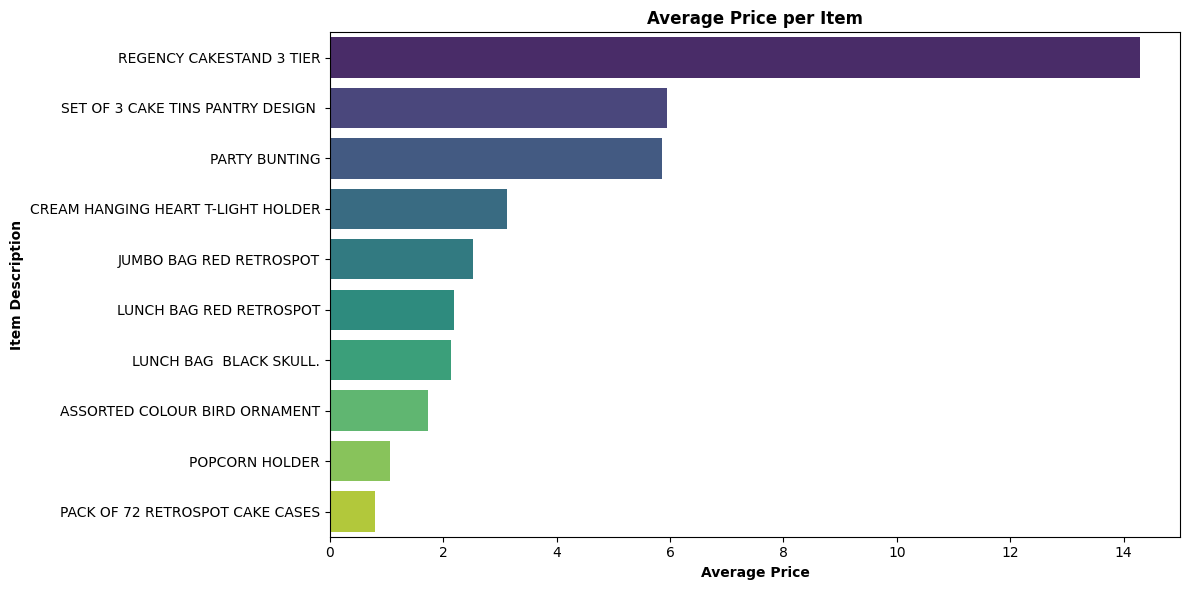

In [6]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.
avg_price_per_item = data.groupby('Description')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_item.values, y=avg_price_per_item.index, palette='viridis')
plt.xlabel('Average Price',weight = "bold")
plt.ylabel('Item Description',weight = "bold")
plt.title('Average Price per Item',weight = "bold")
plt.tight_layout()
plt.show()






# Explore the distribution of the numeric variable `Price`

In [7]:
# Get a DataFrame of summary statistics for numeric variables only.
desc_numeric = data.describe()
desc_numeric

,Quantity,InvoiceDate,Price,TotalAmount
count,15206.000000,15206,15194.000000,15194.000000
mean,16.775483,2011-06-19 06:03:05.279494912,4.164267,40.705153
min,1.000000,2010-12-01 08:26:00,0.400000,0.550000
25%,2.000000,2011-03-22 15:31:00,1.650000,8.850000
50%,6.000000,2011-06-20 12:32:00,2.550000,16.500000
75%,12.000000,2011-09-23 12:57:30,4.950000,30.360000
max,4300.000000,2011-12-09 12:31:00,32.040000,4921.500000
std,79.496270,NaN,4.377605,132.142503


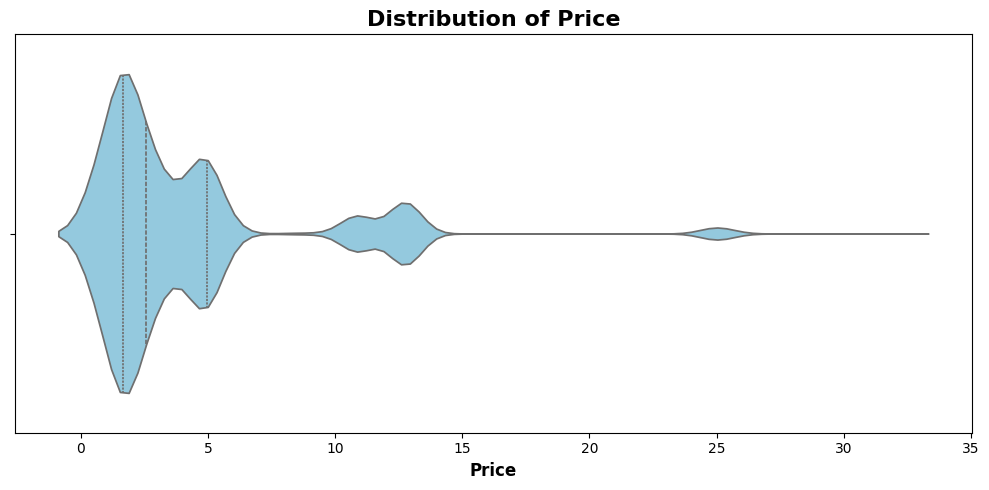

In [8]:
# Generate a violin plot for the "Price" variable.
# Decorate and style the plot however you think is best.

plt.figure(figsize=(10, 5))
sns.violinplot(x=data['Price'], inner='quartile', color='skyblue')
plt.title('Distribution of Price', fontsize=16, weight='bold')
plt.xlabel('Price', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

# Visualize correlations between numeric variables

In [9]:
# Generate a correlation matrix between all numeric variables.
corr_matrix = data.corr(numeric_only=True)
corr_matrix




,Quantity,Price,TotalAmount
Quantity,1.000000,-0.088356,0.745641
Price,-0.088356,1.000000,0.109054
TotalAmount,0.745641,0.109054,1.000000


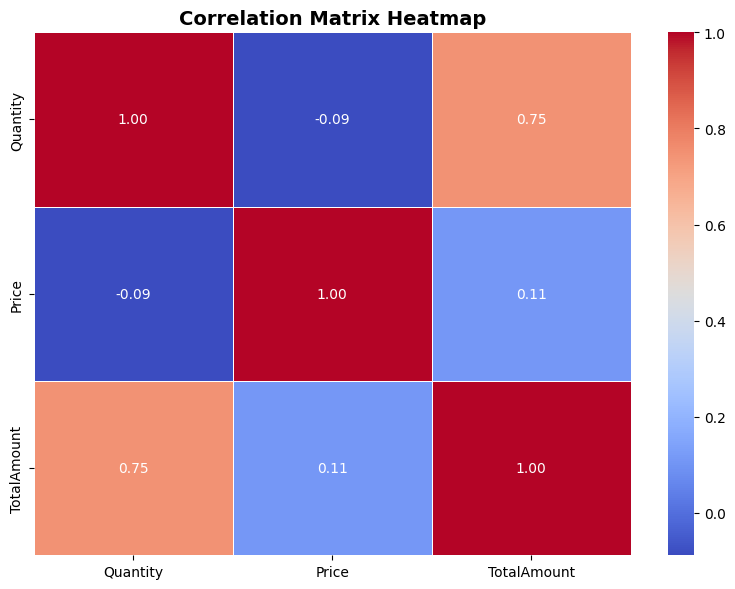

In [10]:
# Visualize the correlations with a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()




# Transform skewed variables

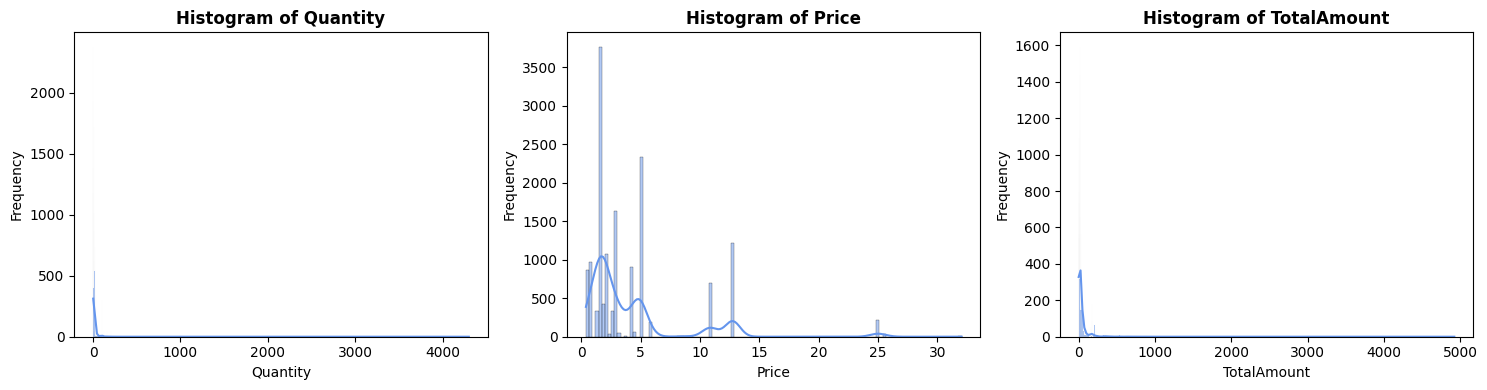

In [11]:
# Plot histograms for the original distributions of all numeric variables.
numeric_cols = ['Quantity', 'Price', 'TotalAmount']
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col].dropna(), kde=True, color='cornflowerblue')
    plt.title(f'Histogram of {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

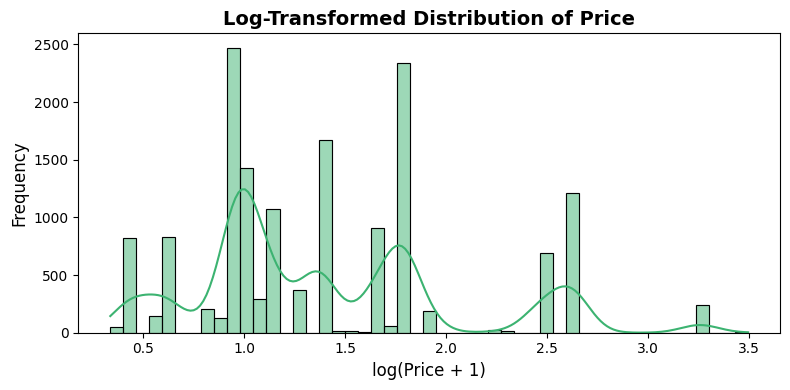

In [12]:
# Plot the log transformation of "Price".
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(data['Price'].dropna()), kde=True, color='mediumseagreen')
plt.title('Log-Transformed Distribution of Price', fontsize=14, weight='bold')
plt.xlabel('log(Price + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

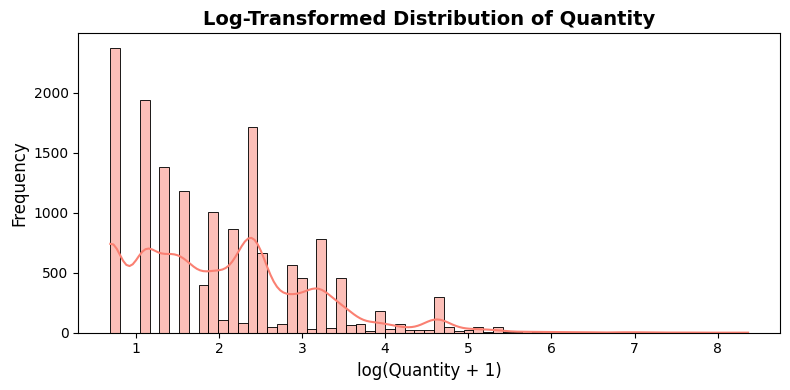

In [13]:
# Plot the log transformation of "Quantity".

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(data['Quantity'].dropna()), kde=True, color='salmon')
plt.title('Log-Transformed Distribution of Quantity', fontsize=14, weight='bold')
plt.xlabel('log(Quantity + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


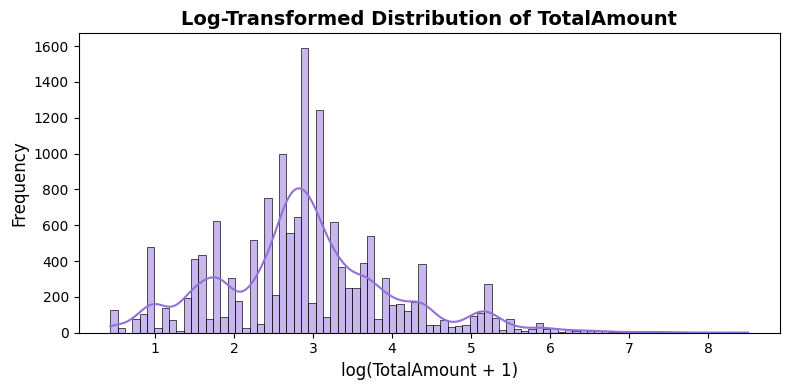

In [14]:
# Plot the log transformation of "TotalAmount".
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(data['TotalAmount'].dropna()), kde=True, color='mediumpurple')
plt.title('Log-Transformed Distribution of TotalAmount', fontsize=14, weight='bold')
plt.xlabel('log(TotalAmount + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()



# Analyze time series data

In [15]:
# Obtain the number of invoices by month.
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')
invoices_by_month = data.groupby('InvoiceMonth')['Invoice'].nunique()

# Print the number of invoices by month.
print(invoices_by_month)


InvoiceMonth
2010-12    607
2011-01    502
2011-02    511
2011-03    696
2011-04    602
2011-05    783
2011-06    665
2011-07    667
2011-08    602
2011-09    750
2011-10    713
2011-11    968
2011-12    249
Freq: M, Name: Invoice, dtype: int64


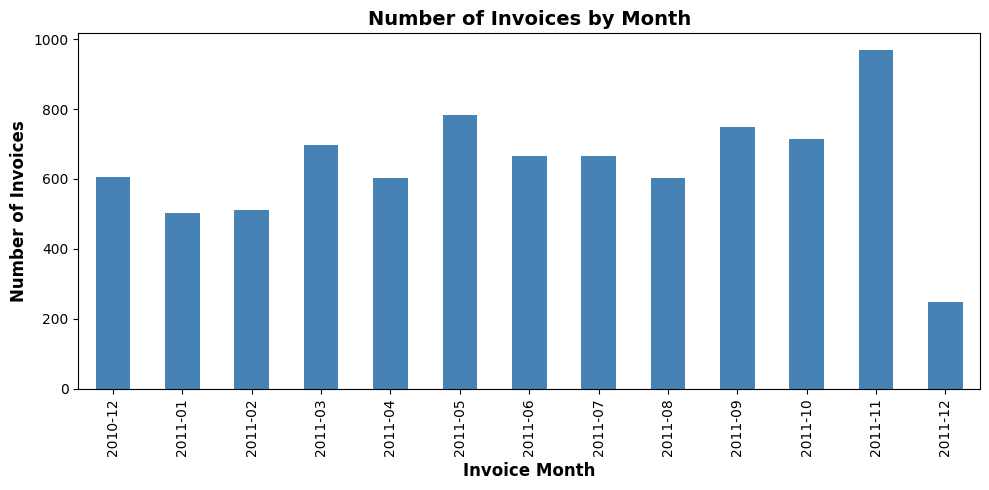

In [16]:
# Use a bar chart to plot the number of invoices by month.
plt.figure(figsize=(10, 5))
invoices_by_month.plot(kind='bar', color='steelblue')
plt.xlabel('Invoice Month', fontsize=12, weight='bold')
plt.ylabel('Number of Invoices', fontsize=12, weight='bold')
plt.title('Number of Invoices by Month', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()



# Identify and handle missing data

In [17]:
# Identify any missing data for all variables.
missing_data = data.isnull().sum()
missing_data

Invoice            0
StockCode          0
Quantity           0
InvoiceDate        0
Price             12
CustomerID      2771
Country            0
TotalAmount       12
Description        0
InvoiceMonth       0
dtype: int64

In [18]:
# Print the current shape of the data.
print('Current shape:', data.shape)

# Remove rows where "CustomerID" is missing (unknown)
data = data[~data['CustomerID'].isnull()]

print('New shape after removing unknown CustomerID:', data.shape)

Current shape: (15206, 10)
New shape after removing unknown CustomerID: (12435, 10)


In [19]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.

data['Price'].fillna(0, inplace=True)
data['TotalAmount'].fillna(0, inplace=True)
# Confirm there are no longer any missing values.
missing_data_after_fill = data.isnull().sum()
missing_data_after_fill



C:\Users\User\AppData\Local\Temp\ipykernel_1608\1708831481.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Price'].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1608\1708831481.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

Invoice         0
StockCode       0
Quantity        0
InvoiceDate     0
Price           0
CustomerID      0
Country         0
TotalAmount     0
Description     0
InvoiceMonth    0
dtype: int64

# One-hot encode the `Description` variable

In [20]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".

description_dummies = pd.get_dummies(data['Description'], prefix='Description')

# Preview the first five rows of the DataFrame.
data.head(5)


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description,InvoiceMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,2010-12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT,2010-12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,2010-12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER,2010-12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT,2010-12


In [21]:
# Concatenate the new encoded columns with the main DataFrame.
data = pd.concat([data, description_dummies], axis=1)



# Drop the original "Description" variable.
data.drop('Description', axis=1, inplace=True)


In [22]:
# Preview the first five rows of the data.

data.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,InvoiceMonth,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False,False
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,2010-12,True,False,False,False,False,False,False,False,False,False
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False,False
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False,False
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,2010-12,False,False,False,False,True,False,False,False,False,False


# Identify and remove columns with low variance

In [26]:
# Obtain the standard deviation of each variable.
std_devs = data.std(numeric_only=True)
std_devs

Quantity                                           77.436253
Price                                               3.506381
TotalAmount                                       132.092738
Description_ASSORTED COLOUR BIRD ORNAMENT           0.308044
Description_CREAM HANGING HEART T-LIGHT HOLDER      0.362575
Description_JUMBO BAG RED RETROSPOT                 0.322017
Description_LUNCH BAG  BLACK SKULL.                 0.274661
Description_LUNCH BAG RED RETROSPOT                 0.288011
Description_PACK OF 72 RETROSPOT CAKE CASES         0.254417
Description_PARTY BUNTING                           0.306081
Description_POPCORN HOLDER                          0.267557
Description_REGENCY CAKESTAND 3 TIER                0.317766
Description_SET OF 3 CAKE TINS PANTRY DESIGN        0.273557
dtype: float64

In [ ]:
# Define a standard deviation threshold of 0.26.
std_threshold = 0.26

# Identify any columns that are lower than the threshold.
low_var_cols = std_devs[std_devs < std_threshold].index.tolist()
# Print the column(s) that will be dropped.
print('Columns to drop due to low variance:', low_var_cols)



Columns to drop due to low variance: ['Description_PACK OF 72 RETROSPOT CAKE CASES']


In [28]:
# Drop the column(s) that have low standard deviation from the main dataset.
data.drop(columns=low_var_cols, inplace=True)


# Preview the first five rows of data.
data.head(5)


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,InvoiceMonth,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,2010-12,True,False,False,False,False,False,False,False,False
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,2010-12,False,True,False,False,False,False,False,False,False
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,2010-12,False,False,False,False,True,False,False,False,False


# Generate box plots for each numeric variable

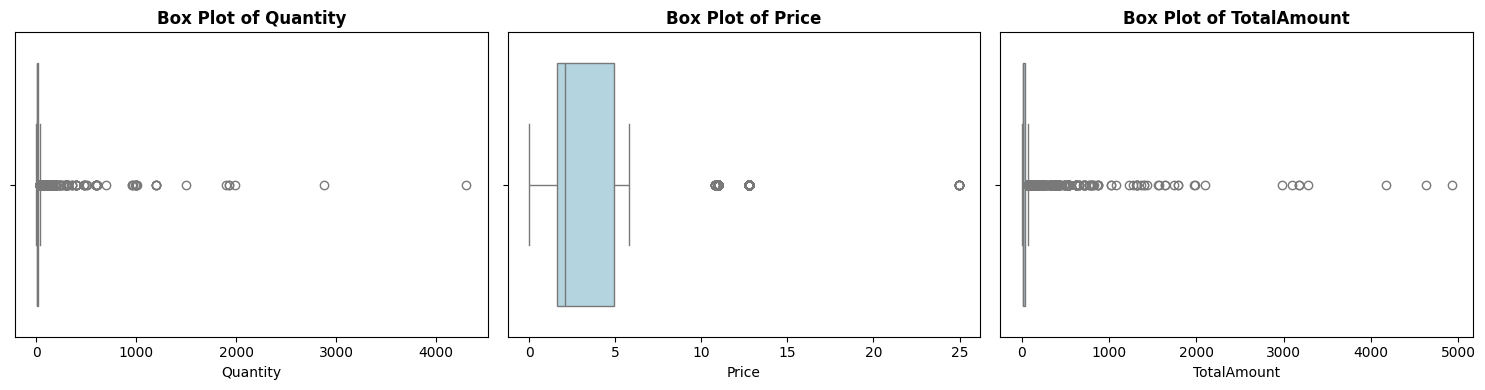

In [ ]:
# Draw box plots for each numeric variable.
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Box Plot of {col}', fontsize=12, weight='bold')
    plt.xlabel(col, fontsize=10)
plt.tight_layout()
plt.show()





# Identify and remove outliers

In [31]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [33]:
# Identify the shape of the data before removing outliers.
print('Shape before removing outliers:', data.shape)



Shape before removing outliers: (12435, 18)


In [ ]:
# Call the calc_outliers() function iteratively for each numeric variable.
# For each variable:
#     Remove the outliers that are higher than the upper bounds.
#     Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.

for col in numeric_cols:
    lb, ub = calc_outliers(data[col])
    # Remove outliers above upper bound and below lower bound
    data = data[(data[col] <= ub) & (data[col] >= lb)]
    print(f'Shape after removing outliers for {col}:', data.shape)




Lower bound of outliers: -15.0 
Upper bound of outliers: 33.0
Shape after removing outliers for Quantity: (11480, 18)
Lower bound of outliers: -3.3 
Upper bound of outliers: 9.9
Shape after removing outliers for Price: (10086, 18)
Lower bound of outliers: -11.7 
Upper bound of outliers: 40.3
Shape after removing outliers for TotalAmount: (9133, 18)


# Save the final dataset as a pickle file

In [37]:
data.to_pickle('online_history_cleaned_final.pickle')